In [2]:
from pyhdf.SD import SD, SDC 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import pprint

import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
# from mpl_toolkits.basemap import Basemap

In [3]:
#----------------------------------------------------------------------------------------#
# inputs

file_name = 'MYD02HKM.A2012162.2025.061.2018040081534.hdf'

file = SD(file_name, SDC.READ)

In [5]:
file

In [38]:
#----------------------------------------------------------------------------------------#

selected_sds = file.select('Latitude')
Lat_raw = selected_sds.get()

selected_sds = file.select('Longitude')
Lon_raw = selected_sds.get()

In [5]:
Lon_raw.shape

(2030, 1354)

In [6]:
lat_SGP = 36. + 36./60. + 26.3592/360.
lon_SGP = -(97 + 29./60. + 15.5148/360.)

In [7]:
ind = np.where((Lat_raw > lat_SGP - 0.01) & (Lat_raw < lat_SGP + 0.01) & (Lon_raw > lon_SGP - 0.01) & (Lon_raw < lon_SGP + 0.01) ) 

In [8]:
ind

(array([1665, 1670], dtype=int64), array([24, 24], dtype=int64))

In [9]:
print(Lon_raw[ind])

[-97.526306 -97.531105]


In [10]:
Lat_raw[:,24]

array([21.879265, 21.896069, 21.912874, ..., 39.891136, 39.908005,
       39.92487 ], dtype=float32)

In [11]:
ind_lat_SGP = 1670*2
ind_lon_SGP = 24*2

In [12]:
print(Lat_raw[ind])

[36.669815 36.672787]


In [13]:
print(Lon_raw[ind])

[-97.526306 -97.531105]


In [14]:
print(ind)

(array([1665, 1670], dtype=int64), array([24, 24], dtype=int64))


In [15]:
print(Lon_raw[:,1])

[-94.35064 -94.35218 -94.35371 ... -96.75938 -96.75969 -96.76057]


In [16]:
print(Lon_raw[:,1353])

[-116.33219  -116.33634  -116.340515 ... -122.96034  -122.96756
 -122.9748  ]


In [17]:
ind = np.where((Lat_raw > lat_SGP - 0.01) & (Lat_raw < lat_SGP + 0.01)) 

In [18]:
ind

(array([1657, 1658, 1658, ..., 2028, 2029, 2029], dtype=int64),
 array([   0,    0,    1, ..., 1312, 1312, 1313], dtype=int64))

In [19]:
#----------------------------------------------------------------------------------------#

selected_sds = file.select('EV_250_Aggr500_RefSB')

selected_sds_attributes = selected_sds.attributes()

for key, value in selected_sds_attributes.items():
	#print key, value
	if key == 'reflectance_scales':
		reflectance_scales_250_Aggr1km_RefSB = np.asarray(value)		
	if key == 'reflectance_offsets':
		reflectance_offsets_250_Aggr1km_RefSB = np.asarray(value)	

sds_data_250_Aggr1km_RefSB = selected_sds.get()

print('sds_data shape', sds_data_250_Aggr1km_RefSB.shape)
print(reflectance_scales_250_Aggr1km_RefSB.shape)

sds_data shape (2, 4060, 2708)
(2,)


In [20]:
#----------------------------------------------------------------------------------------#

selected_sds = file.select('EV_500_RefSB')

selected_sds_attributes = selected_sds.attributes()

for key, value in selected_sds_attributes.items():
	if key == 'reflectance_scales':
		reflectance_scales_500_Aggr1km_RefSB = np.asarray(value)	
	if key == 'reflectance_offsets':
		reflectance_offsets_500_Aggr1km_RefSB = np.asarray(value)	

sds_data_500_Aggr1km_RefSB = selected_sds.get()

print( reflectance_scales_500_Aggr1km_RefSB.shape)

(5,)


In [21]:
#----------------------------------------------------------------------------------------#

data_shape = sds_data_250_Aggr1km_RefSB.shape

along_track = data_shape[1]
cross_trak = data_shape[2]

z = np.zeros((along_track, cross_trak,3))

z[:,:,0] = ( sds_data_250_Aggr1km_RefSB[0,:,:] - reflectance_offsets_250_Aggr1km_RefSB[0] ) * reflectance_scales_250_Aggr1km_RefSB[0] 
z[:,:,1] = ( sds_data_500_Aggr1km_RefSB[1,:,:] - reflectance_offsets_500_Aggr1km_RefSB[1] ) * reflectance_scales_500_Aggr1km_RefSB[1] 
z[:,:,2] = ( sds_data_500_Aggr1km_RefSB[0,:,:] - reflectance_offsets_500_Aggr1km_RefSB[0] ) * reflectance_scales_500_Aggr1km_RefSB[0] 

In [22]:
cross_trak

2708

In [23]:
along_track

4060

In [24]:
#----------------------------------------------------------------------------------------#

norme = 0.4 # factor to increase the brightness ]0,1]

rgb = np.zeros((along_track, cross_trak,3))

rgb = z / norme

rgb[ rgb > 1 ] = 1.0
rgb[ rgb < 0 ] = 0.0

In [25]:
rgb.shape

(4060, 2708, 3)

In [26]:
ind_lat_SGP

3340

In [27]:
ind_lon_SGP

48

In [56]:
Lat_plt= Lat_raw.repeat(2, 0).repeat(2, 1)
Lon_plt = Lon_raw.repeat(2, 0).repeat(2, 1)

In [57]:
Lat_plt.shape

(4060, 2708)

In [58]:
extent = [-107, -87, 25, 45]

In [46]:
ind = np.where((Lat_raw > extent[2]) & (Lat_raw < extent[3]) & (Lon_raw > extent[0]) & (Lon_raw < extent[1]) ) 

In [49]:
ind[1]

array([  0,   1,   2, ..., 410, 411, 412], dtype=int64)

In [59]:
ind = np.where((Lat_plt > lat_SGP - 0.01) & (Lat_plt < lat_SGP + 0.01) & (Lon_plt > lon_SGP - 0.01) & (Lon_plt < lon_SGP + 0.01) ) 

In [60]:
ind

(array([3330, 3330, 3331, 3331, 3340, 3340, 3341, 3341], dtype=int64),
 array([48, 49, 48, 49, 48, 49, 48, 49], dtype=int64))

Text(0.5, 1.0, 'MODIS image')

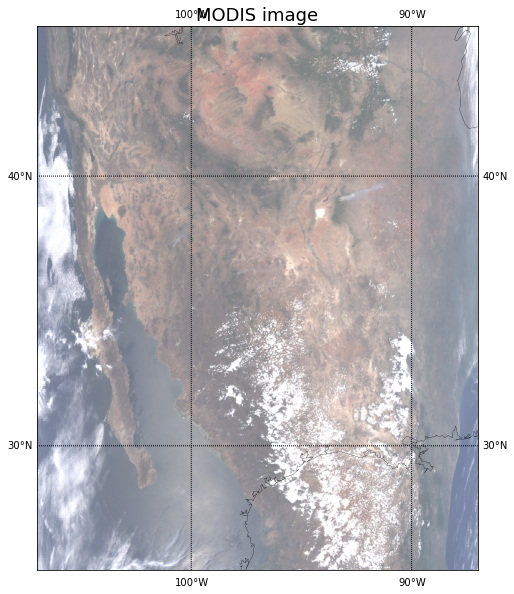

In [55]:
#----------------------------------------------------------------------------------------#
# plot image using matplotlib

# sns.set(context="talk", style="ticks", font_scale=1.2)
myfontsize = 18

fig, ax = plt.subplots(1,1,figsize=[10, 10])

# rgb_plt = rgb[ind_lat_SGP - 50:ind_lat_SGP + 50,ind_lon_SGP - 40:ind_lon_SGP + 40,:]

rgb_use = rgb
rgb_plt = np.fliplr(rgb_use)

extent = [-107, -87, 25, 45] # [left, right, bottom, top]


m = Basemap(projection='merc', llcrnrlon=extent[0], urcrnrlon=extent[1], llcrnrlat=extent[2],
            urcrnrlat=extent[3], resolution='l')

m.drawcoastlines(linewidth=0.25)
# m.fillcontinents()
parallels = np.arange(0.,81,10.)

m.drawparallels(parallels,labels=[True,True,True,True])
meridians = np.arange(10.,351.,10.)
m.drawmeridians(meridians,labels=[True,True,True,True])

m.imshow(rgb_plt, extent=extent, alpha=0.6)

# img = plt.imshow(np.fliplr(rgb_plt), interpolation='nearest', origin='lower')

plt.xticks(fontsize=myfontsize)
plt.yticks(fontsize=myfontsize)

plt.title('MODIS image', fontsize=myfontsize)

# plt.savefig("modis_granule_rgb.png", bbox_inches='tight', dpi=100)

#plt.show()

# plt.close()